<a href="https://colab.research.google.com/github/Duydeptrai20/Duy-Thai/blob/main/nh%E1%BA%ADn_d%E1%BA%A1ng_ch%C3%B3_m%C3%A8o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import os
import cv2 as cv
import tensorflow as tf
import random
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img,img_to_array
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:


folder = '/content/drive/MyDrive/data1/train'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('dog'):
    output = 0
  if file.startswith('cat'):
    output = 1 
  photo = load_img(folder+'/'+file, target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('dogs_vs_cats_photos.npy',photos)
save('dogs_vs_cats_labels.npy',labels)

(2020, 200, 200, 3) (2020,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.3, random_state=2)

In [ ]:
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(1, activation='sigmoid'))

In [ ]:

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',  metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.save('/content/drive/MyDrive/data1/MODEL_STORES/model_cats_dogs.h5')

In [ ]:

model = VGG16(include_top = False, input_shape=(200,200,3))
for layer in model.layers:
  layer.trainable = False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
model=Model(inputs = model.input, outputs = output)
opt=SGD(lr = 0.01, momentum=0.9)
model.compile(optimizer =opt, loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, epochs=10, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
64/64 [==============================] - 10s 131ms/step - loss: 67.3836 - accuracy: 0.7842
Epoch 2/10
64/64 [==============================] - 8s 132ms/step - loss: 8.8239 - accuracy: 0.7485
Epoch 3/10
64/64 [==============================] - 8s 132ms/step - loss: 0.5657 - accuracy: 0.6604
Epoch 4/10
64/64 [==============================] - 9s 133ms/step - loss: 0.5400 - accuracy: 0.6599
Epoch 5/10
64/64 [==============================] - 9s 135ms/step - loss: 0.5401 - accuracy: 0.6599
Epoch 6/10
64/64 [==============================] - 9s 137ms/step - loss: 0.5399 - accuracy: 0.6599
Epoch 7/10
64/64 [==============================] - 9s 138ms/step - loss: 0.5400 - accuracy: 0.6599
Epoch 8/10
64/64 [==============================] - 9s 139ms/step - loss: 0.5399 - accuracy: 0.6599
Epoch 9/10
64/64 [==============================] - 9s 139ms/step - loss: 0.5400 - accuracy: 0.6599
Epoch 10/10
64/64 [==============================] - 9s 140ms/step - loss: 0.5399 - accuracy: 0.65

array([0])

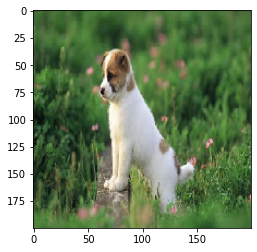

In [ ]:
from keras.preprocessing import image
pic = image.load_img('/content/unnamed.jpg', target_size=(200,200)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,200,200,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

array([0])

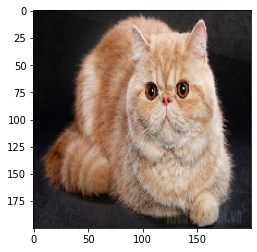

In [ ]:
from keras.preprocessing import image
pic = image.load_img('/content/meo.jpg', target_size=(200,200)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,200,200,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

array([0])

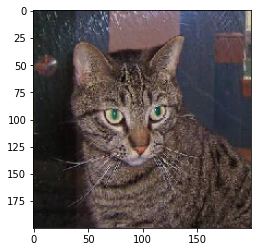

In [ ]:
from keras.preprocessing import image
pic = image.load_img('/content/drive/MyDrive/data/train/cats/cat.1.jpg', target_size=(200,200)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,200,200,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)